In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [290]:
df = pd.read_csv('hotel_bookings.csv')

In [291]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [292]:
df.shape

(119390, 32)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [294]:
# missing data
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [295]:
# missing data %
df.isnull().mean()*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [296]:
# getting columns which have missing values
[i for i in df.columns if df[i].isnull().mean()>0]

['children', 'country', 'agent', 'company']

In [297]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [298]:
# duplicated data
# df[df.duplicated()]


In [299]:
df.fillna(0,inplace=True)

In [300]:
# duplicated sum
df.duplicated().sum()

31994

not deleting duplicates, will work later on this

In [301]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

# hotel vs is_canceled vs is_repeated_guest vs meal

<AxesSubplot:ylabel='meal'>

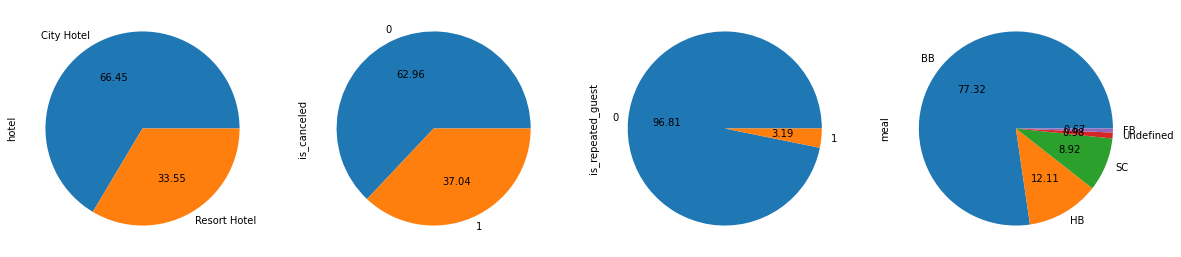

In [302]:
plt.figure(figsize=(20,5))
plt.subplot(141)
df['hotel'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(142)
df['is_canceled'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(143)
df['is_repeated_guest'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(144)
df['meal'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='stays_in_week_nights'>

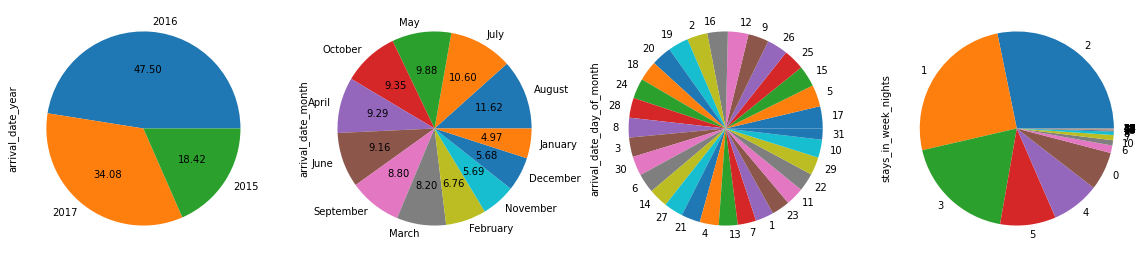

In [303]:
plt.figure(figsize=(20,5))
plt.subplot(141)
df['arrival_date_year'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(142)
df['arrival_date_month'].value_counts().plot(kind='pie',autopct='%.2f')

plt.subplot(143)
df['arrival_date_day_of_month'].value_counts().plot(kind='pie')

plt.subplot(144)
df['stays_in_week_nights'].value_counts().plot(kind='pie')

Text(0.5, 1.0, 'babies')

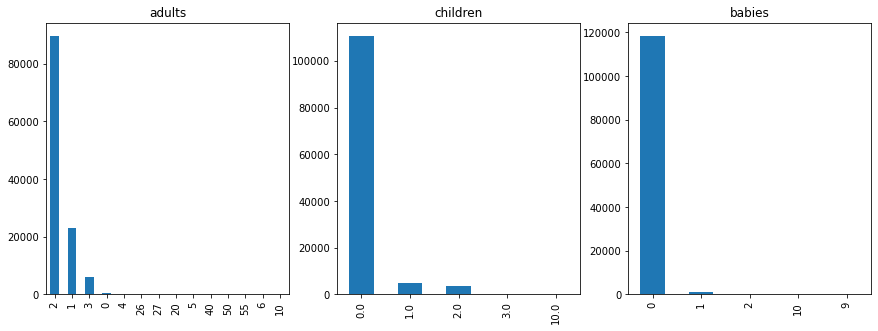

In [304]:
plt.figure(figsize=(20,5))
plt.subplot(141)
df['adults'].value_counts().plot(kind='bar')
plt.title('adults')

plt.subplot(142)
df['children'].value_counts().plot(kind='bar')
plt.title('children')

plt.subplot(143)
df['babies'].value_counts().plot(kind='bar')
plt.title('babies')


<AxesSubplot:xlabel='babies', ylabel='adults'>

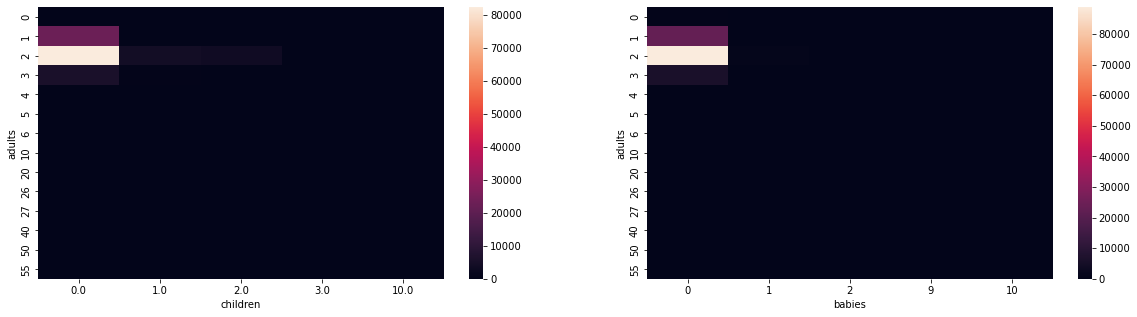

In [305]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.heatmap(pd.crosstab(df['adults'],df['children']))

plt.subplot(122)
sns.heatmap(pd.crosstab(df['adults'],df['babies']))

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<AxesSubplot:ylabel='deposit_type'>

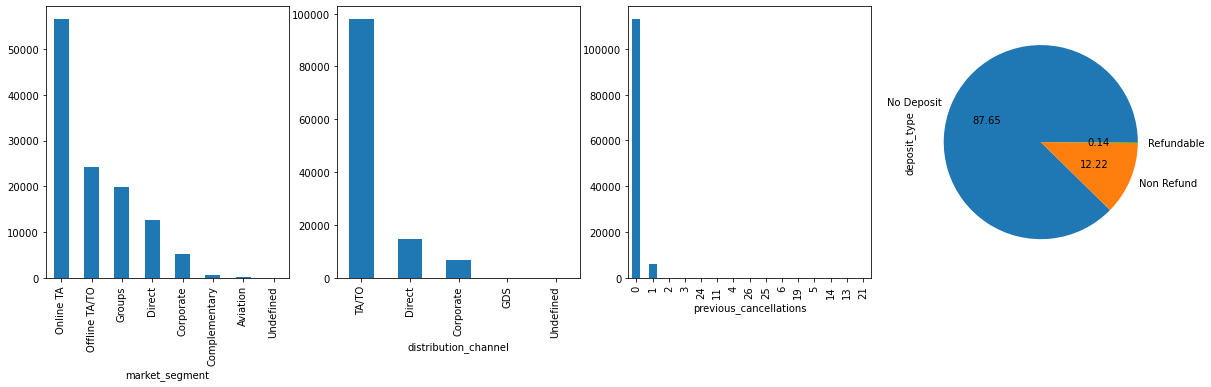

In [307]:
plt.figure(figsize=(20,5))
plt.subplot(141)
df['market_segment'].value_counts().plot(kind='bar')
plt.xlabel('market_segment')

plt.subplot(142)
df['distribution_channel'].value_counts().plot(kind='bar')
plt.xlabel('distribution_channel')
plt.subplot(143)
df['previous_cancellations'].value_counts().plot(kind='bar')
plt.xlabel('previous_cancellations')
plt.subplot(144)
df['deposit_type'].value_counts().plot(kind='pie',autopct='%.2f')

C:\Users\withu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company', ylabel='agent'>

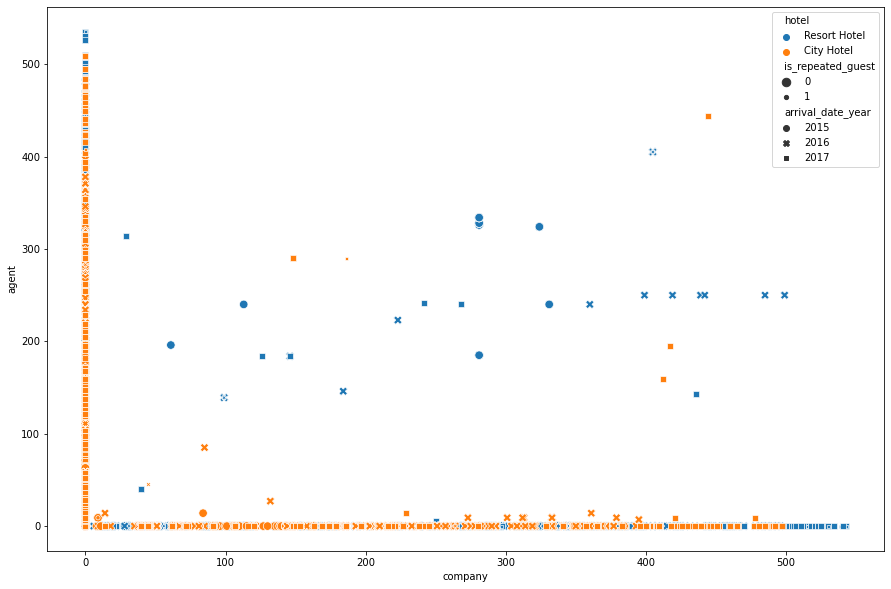

In [308]:
plt.figure(figsize=(15,10))
sns.scatterplot(df['company'],df['agent'],hue=df['hotel'],style=df['arrival_date_year'],size=df['is_repeated_guest'])

<AxesSubplot:ylabel='reservation_status'>

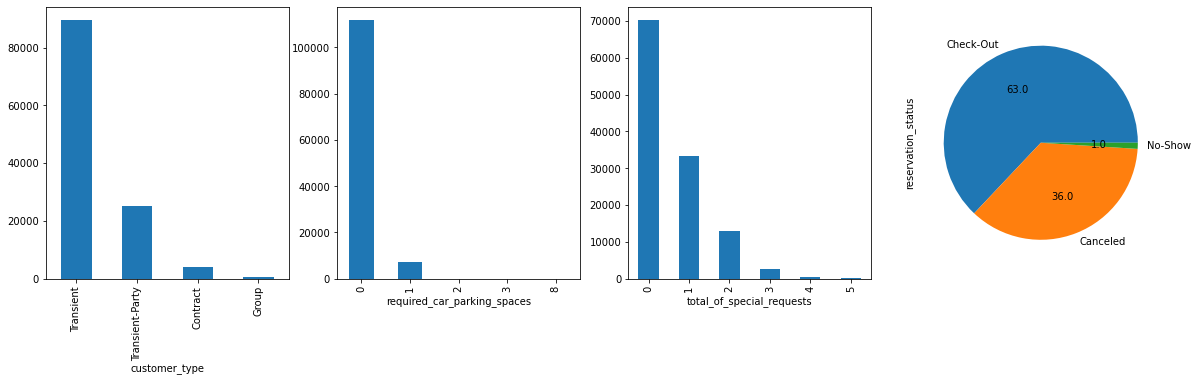

In [309]:
plt.figure(figsize=(20,5))
plt.subplot(141)
df['customer_type'].value_counts().plot(kind='bar')
plt.xlabel('customer_type')
plt.subplot(142)
df['required_car_parking_spaces'].value_counts().plot(kind='bar')
plt.xlabel('required_car_parking_spaces')
plt.subplot(143)
df['total_of_special_requests'].value_counts().plot(kind='bar')
plt.xlabel('total_of_special_requests')

plt.subplot(144)
df['reservation_status'].value_counts().plot(kind='pie',autopct='%.1f')

In [310]:
# sns.pairplot(df)

C:\Users\withu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='adults', ylabel='arrival_date_year'>

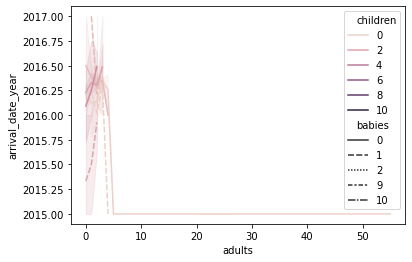

In [311]:
sns.lineplot(df['adults'],df['arrival_date_year'],hue=df['children'],style=df['babies'],legend='brief')

C:\Users\withu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='adults', ylabel='arrival_date_month'>

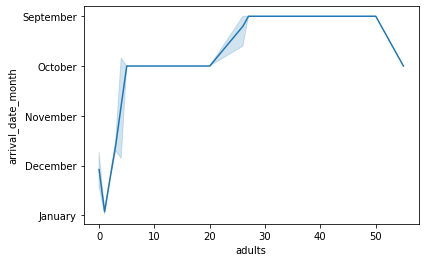

In [312]:
sns.lineplot(df['adults'],df['arrival_date_month'])

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [314]:
from datetime import datetime
df['arrival_date_year'] = pd.to_datetime(df['arrival_date_year'], format='%Y')

In [315]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='hotel.html')

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  datetime64[ns]
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64